# Capacity factor creation from water levels

The Bavarian hydrological service provides data about the water level of [various rivers](http://www.gkd.bayern.de/fluesse/abfluss/karten/index.php?thema=gkd&rubrik=fluesse&produkt=wasserstand&gknr=0&sp=en). The data is liscenced via [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/).

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import ExcelWriter
from datetime import datetime
%matplotlib notebook
pd.options.mode.chained_assignment = None  # default='warn' (turn off warning)

Select year

In [2]:
year = '2015'

Define path and cities

In [3]:
path = []
folder = 'Zeitreihen'
cities = ['Augsburg', 'München', 'Passau', 'Pettstadt', 'Regensburg', 'Roth', 'Würzburg']
data_type = '.csv'
for lv in range(0,len(cities)):
    path.append(os.path.join(folder, 'WS '+cities[lv]+data_type))

In [30]:
wasserstaende = pd.DataFrame()

## Data extraction
Read csv and put it into DataFrame

In [31]:
for lv in range(0,len(path)):
    help_df = pd.read_csv(path[lv],sep=';', skiprows=11, names=['Time',cities[lv]],
                          index_col=0, usecols=[0,1], parse_dates=[0], decimal=',')
    wasserstaende = pd.concat([wasserstaende, help_df], axis=1)

In [32]:
col_dict= {'Augsburg': 'Schwaben',
           'München': 'Oberbayern',
           'Passau': 'Niederbayern',
           'Pettstadt': 'Oberfranken',
           'Regensburg': 'Oberpfalz',
           'Roth': 'Mittelfranken',
           'Würzburg': 'Unterfranken'}
wasserstaende = wasserstaende.rename(columns=col_dict)
wasserstaende[year].head()

,Schwaben,Oberbayern,Niederbayern,Oberfranken,Oberpfalz,Mittelfranken,Unterfranken
Time,,,,,,,
2015-01-01 00:00:00,63.0,49.0,420.0,157.0,297.0,138.0,176.0
2015-01-01 00:15:00,63.0,48.8,420.0,157.0,297.0,138.0,176.0
2015-01-01 00:30:00,63.0,48.1,420.0,158.0,297.0,138.0,176.0
2015-01-01 00:45:00,63.0,48.6,421.0,158.0,296.0,138.0,177.0
2015-01-01 01:00:00,63.0,49.4,424.0,159.0,296.0,138.0,177.0


In [7]:
wasserstaende[year].tail()

,Augsburg.Hydro,München.Hydro,Passau.Hydro,Pettstadt.Hydro,Regensburg.Hydro,Roth.Hydro,Würzburg.Hydro
Time,,,,,,,
2015-12-31 22:45:00,70.0,46.0,392.0,150.0,295.0,139.0,168.0
2015-12-31 23:00:00,70.0,46.0,392.0,151.0,295.0,140.0,169.0
2015-12-31 23:15:00,70.0,46.0,392.0,151.0,295.0,140.0,169.0
2015-12-31 23:30:00,70.0,46.0,393.0,152.0,295.0,139.0,170.0
2015-12-31 23:45:00,69.0,46.2,394.0,154.0,294.0,139.0,170.0


<IPython.core.display.Javascript object>


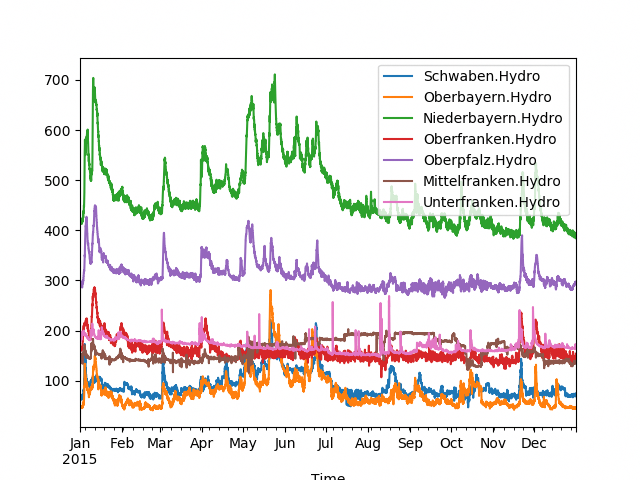

In [25]:
wasserstaende[year].plot()

Resample timeseries, as only one value per hour is needed

In [33]:
ws_hourly = wasserstaende.resample('1H').mean()

The following data is taken from the [Energieatlas Bayern](https://www.energieatlas.bayern.de/) (Bavarian government) and licensed via [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/)

In [34]:
# Extract summed yearly produced energy in administrative regions in Bavaria
folder = 'Daten'
sheet = 'Wasserkraft - Gesamtstromverbrauch RB Bayern'
path_sheet = os.path.join(folder, sheet+data_type)
waterproduction = pd.read_csv(path_sheet, sep=',', index_col=0)
col_dict = {'Geometrie (EWKT)': 'geo',
            'Verwaltungseinheit': 'number',
            'Verwaltungsebene': 'type',
            'Anteil Wasserkraft am Gesamtstromverbrauch (%)': 'wpercent',
            'Gesamtstromverbrauch (MWh/a)': 'energy',
            'Einwohnerzahl': 'habitants',
            'Fläche (km²)': 'area'}
waterproduction = waterproduction.rename(columns=col_dict)

sheet = 'Wasserkraft - Installierte Leistung RB Bayern'
path_sheet = os.path.join(folder, sheet+data_type)
watercap = pd.read_csv(path_sheet, sep=',', index_col=0)
col_dict = {'Geometrie (EWKT)' : 'geo',
            'Verwaltungseinheit': 'number',
            'Verwaltungsebene': 'type',
            'Anzahl Wasserkraftanlagen': 'water',
            'Installierte Leistung (MW) Wasserkraft': 'cap'}
watercap = watercap.rename(columns=col_dict)
    
flh = waterproduction.wpercent/100*waterproduction.energy/watercap.cap
flh

Name
Oberbayern       5020.277187
Niederbayern     5119.334431
Oberpfalz        4133.459227
Oberfranken      3523.090000
Mittelfranken    4566.828419
Unterfranken     6098.129861
Schwaben         5305.127453
dtype: float64

<IPython.core.display.Javascript object>


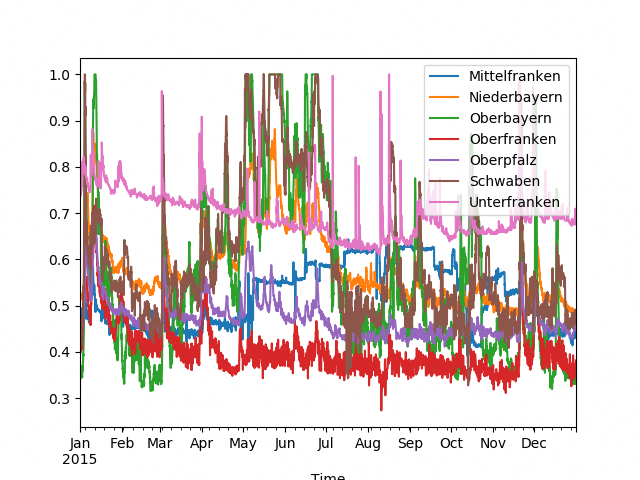

In [35]:
# normalize timeseries to full load hours
normalized = ws_hourly[year]/ws_hourly[year].sum()*flh
# cut off values greater 1
cap_factor = normalized.clip(0,1)
cap_factor.plot()

In [40]:
col_dict = {lv: lv+'.Hydro' for lv in cap_factor.columns}
cap_factor = cap_factor.rename(columns=col_dict)

In [41]:
cap_factor.head()

,Mittelfranken.Hydro,Niederbayern.Hydro,Oberbayern.Hydro,Oberfranken.Hydro,Oberpfalz.Hydro,Schwaben.Hydro,Unterfranken.Hydro
Time,,,,,,,
2015-01-01 00:00:00,0.44291,0.521953,0.361742,0.395169,0.453216,0.416991,0.726226
2015-01-01 01:00:00,0.44291,0.525679,0.359882,0.400187,0.452071,0.413682,0.733437
2015-01-01 02:00:00,0.44291,0.525058,0.364346,0.405205,0.452071,0.412027,0.744768
2015-01-01 03:00:00,0.44291,0.524127,0.358580,0.407714,0.450925,0.426919,0.744768
2015-01-01 04:00:00,0.44291,0.522264,0.361556,0.411477,0.450544,0.440157,0.741678


Write values to excel

In [42]:
cap_factor.to_excel('Hydro '+year+'.xlsx')